In [1]:
import numpy as np
import pandas as pd
import NelsonSiegelFunctions as nsf

import matplotlib.pyplot as plt
from scipy.optimize import fmin, minimize
from scipy.stats import skew, kurtosis

In [2]:
def NelsonSiegelParams(x,y, l1 = 0):
    if l1 != 0:
        fp = lambda c, x: (c[0])+ (c[1]*((1- np.exp(-x/l1))/(x/l1)))+ (c[2]*((((1-np.exp(-x/l1))/(x/l1)))- (np.exp(-x/l1))))
        p0 = np.array([0.01,0.01,0.01])
    else:
        fp = lambda c, x: (c[0])+ (c[1]*((1- np.exp(-x/c[3]))/(x/c[3])))+ (c[2]*((((1-np.exp(-x/c[3]))/(x/c[3])))- (np.exp(-x/c[3]))))
        p0 = np.array([0.01,0.01,0.01,1.00])  
    # error function to minimize
    e = lambda p, x, y: ((fp(p,x)-y)**2).sum()
      
    return (minimize(e, p0, args=(x,y)).x)

def NelsonSiegelSvenssonParams(x,y, l1 = 0, l2 = 0):
    if l1 != 0 and l2 != 0:
        fp = lambda c, x: (c[0])+ (c[1]*((1- np.exp(-x/l1))/(x/l1)))+ (c[2]*((((1-np.exp(-x/l1))/(x/l1)))- (np.exp(-x/l1))))+ (c[3]*((((1-np.exp(-x/l2))/(x/l2)))- (np.exp(-x/l2))))
        p0 = np.array([0.01,0.01,0.01,0.01]) 
    else:
        fp = lambda c, x: (c[0])+ (c[1]*((1- np.exp(-x/c[4]))/(x/c[4])))+ (c[2]*((((1-np.exp(-x/c[4]))/(x/c[4])))- (np.exp(-x/c[4]))))+ (c[3]*((((1-np.exp(-x/c[5]))/(x/c[5])))- (np.exp(-x/c[5]))))
        p0 = np.array([0.01,0.01,0.01,0.01,1.00,1.00]) 
    # error function to minimize
    e = lambda p, x, y: ((fp(p,x)-y)**2).sum()   
    return (minimize(e, p0, args=(x,y)).x)

def getNSSParams(df, l1 = 0, l2 = 0):
    x = df.columns.values
    dic={}
    for index, row in df.iterrows():
        y = df.loc[index].values
        params = NelsonSiegelSvenssonParams(x,y,l1,l2)
        dic[index] = params
    return pd.DataFrame.from_dict(dic)

def getNSParams(df, l1 = 0, l2 = 0):
    x = df.columns.values
    dic={}
    for index, row in df.iterrows():
        y = df.loc[index].values
        params = NelsonSiegelSvenssonParams(x,y,l1,l2)
        dic[index] = params
    return pd.DataFrame.from_dict(dic)

def evalNelsonSiegelSvensson(t,params, l1=0, l2=0):
    c = params
    if l1!=0 and l2!=0:
        c[4]=l1
        c[5]=l2
    j = []
    for h in t:
        #print(len(j))
        j.append((c[0])+ (c[1]*((1- np.exp(-h/c[4]))/(h/c[4])))+ (c[2]*((((1-np.exp(-h/c[4]))/(h/c[4])))- (np.exp(-h/c[4]))))+ (c[3]*((((1-np.exp(-h/c[5]))/(h/c[5])))- (np.exp(-h/c[5])))))
    return j

def getPred(df,df_params, l1=0, l2=0):
    # for the future, pass in what function you want to use to evaluate error
    '''
    Inputs:
    df is the original dataframe containing the data
    df_params is the parameters containing the parameters used to predict
    
    Output:
    returns a dataframe of the predicted values formated like the original
    '''
    x = df.columns.values
    dic = {}
    for column in df_params:
        dic[column] = evalNelsonSiegelSvensson(x,df_params[column], l1, l2)
    predicted = pd.DataFrame.from_dict(dic).transpose()
    predicted.columns = x
    return predicted


In [3]:
df = pd.read_csv("2016 2018 BPAM Yield Matrix.csv", index_col = 0)
df.index = pd.to_datetime(df.index)
df.columns = pd.to_numeric(df.columns.values)
df= df[df.index > np.datetime64("2016-01-01")]
df.head()

,3,6,12,24,36,60,84,120,180,240,300,360
2016-01-04,2.475,2.509,2.587,2.913,3.280,3.532,4.222,4.262,4.754,4.834,4.997,5.198
2016-01-05,2.469,2.503,2.580,2.916,3.295,3.512,4.180,4.275,4.765,4.846,5.010,5.214
2016-01-06,2.482,2.516,2.594,2.945,3.340,3.577,4.192,4.299,4.753,4.797,4.914,5.061
2016-01-07,2.543,2.577,2.656,2.986,3.357,3.592,4.189,4.304,4.758,4.801,4.919,5.068
2016-01-08,2.601,2.636,2.715,2.998,3.314,3.572,4.185,4.298,4.770,4.832,4.973,5.149


In [4]:
l1=74.5
l2=52.78

params = getNSSParams(df, l1, l2)

params

,2016-01-04 00:00:00,2016-01-05 00:00:00,2016-01-06 00:00:00,2016-01-07 00:00:00,2016-01-08 00:00:00,2016-01-11 00:00:00,2016-01-12 00:00:00,2016-01-13 00:00:00,2016-01-14 00:00:00,2016-01-15 00:00:00,...,2018-09-25 00:00:00,2018-09-26 00:00:00,2018-09-27 00:00:00,2018-09-28 00:00:00,2018-10-01 00:00:00,2018-10-02 00:00:00,2018-10-03 00:00:00,2018-10-04 00:00:00,2018-10-05 00:00:00,2018-10-08 00:00:00
0,5.525549,5.562441,5.172763,5.177217,5.306859,5.268021,5.268553,5.231427,5.213334,5.278594,...,6.309190,6.374502,6.427644,6.447384,6.477873,6.493401,6.498913,6.339693,6.400413,6.383087
1,-3.215480,-3.251519,-2.852897,-2.783840,-2.835792,-2.747087,-2.738734,-2.630870,-2.613428,-2.649446,...,-3.144589,-3.212420,-3.255519,-3.287665,-3.326571,-3.329482,-3.330348,-3.173091,-3.229401,-3.207466
2,1.108248,1.116247,2.284689,2.417695,2.608297,3.226946,3.685531,4.081045,4.276318,4.574372,...,-3.106209,-3.575354,-3.822207,-3.920351,-4.488585,-4.078358,-4.152376,-3.348649,-3.540570,-3.335572
3,0.297447,0.210845,-0.228434,-0.491795,-1.081175,-1.722511,-2.181202,-2.712663,-2.875661,-3.420639,...,1.498719,1.859771,1.905001,2.002192,2.547341,2.108564,2.174523,1.805777,1.805321,1.607361


In [5]:
daily_pred = getPred(df,params, 74, 52)
nsf.getPredMatError(df,daily_pred)

{3: 0.0307683697019203,
 6: 0.015903533481069525,
 12: 0.04040079157283009,
 24: 0.04672887341197643,
 36: 0.043316228618004715,
 60: 0.05658458464025586,
 84: 0.06285266893216031,
 120: 0.12228418134053623,
 180: 0.06026940907132226,
 240: 0.073633766636231,
 300: 0.03957806196816218,
 360: 0.03969084735616652}

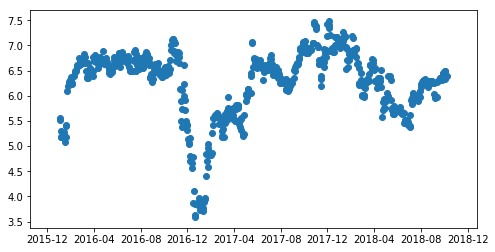

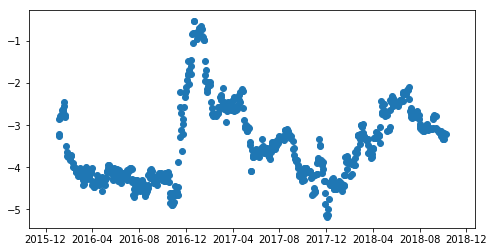

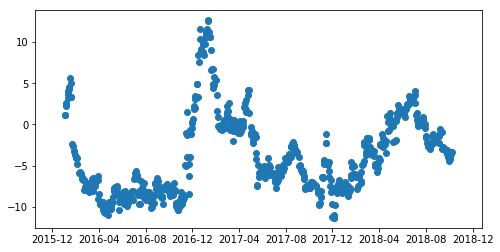

In [6]:
for i in range(0,3):
    plt.figure(figsize = (8,4))
    plt.scatter(params.columns,params.loc[i])
    

In [7]:
error = params.loc[2].values
np.average(error), np.std(error), skew(error), kurtosis(error)

(-3.8645049024914373,
 4.7889081363405595,
 0.9335272569992896,
 0.6159333183868982)